In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

from sage.all import *
from utility import *



In [8]:
x,y,z = var('x, y, z', domain=CC)

# Equation of affine surface
# s1, s2, s3 = var('s1, s2, s3', domain=CC)
G_eq = x*y*z + x^2 +y^2 +z^2
fibration_eq = 3*x +5*y-2*z
# fibration_eq = x-z+y

f = LefschetzFibration([x,y,z], G_eq, fibration_eq)

rho_eq = x+z
# rho_eq = x+z

In [9]:
crit_points_f = f.get_critical_points()
crit_values_f = f.get_critical_values()


print(len(crit_values_f))
print(len(crit_points_f))

8
8


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Critical values of the fibration'}>)

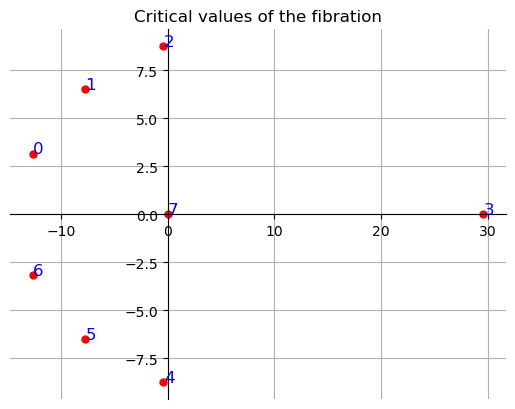

In [11]:
origin_fibre = 5
crit_values_f = sort_by_angle(crit_values_f, origin_fibre)
plot_points_ordered(crit_values_f, 'Critical values of the fibration', origin_fibre=origin_fibre)

## Images of the vanishing cycles of $f$ under $\rho$

### Critical values of $\rho$

(<Figure size 640x480 with 1 Axes>, <Axes: >)

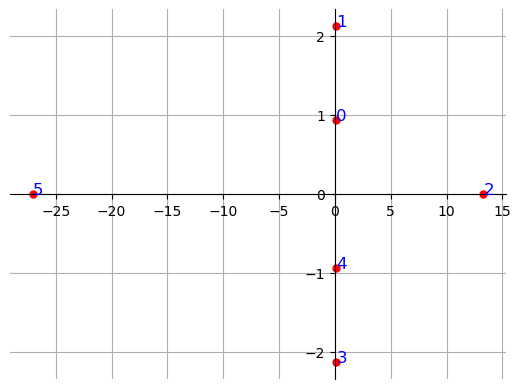

In [12]:
t = var('t', domain=CC)
fibre_t = f.get_fibre(t, y)
rho_eq_t = rho_eq.subs(y==fibre_t)
rho_eq = rho_eq_t.subs(t==origin_fibre)
plot_points_ordered(LefschetzFibration([x,z], fibre_t.subs(t==origin_fibre), rho_eq_t.subs(t==origin_fibre)).get_critical_values(), origin_fibre=origin_fibre)

### Plot the matching paths

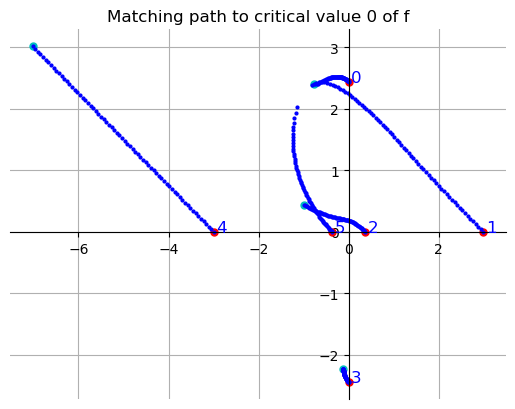

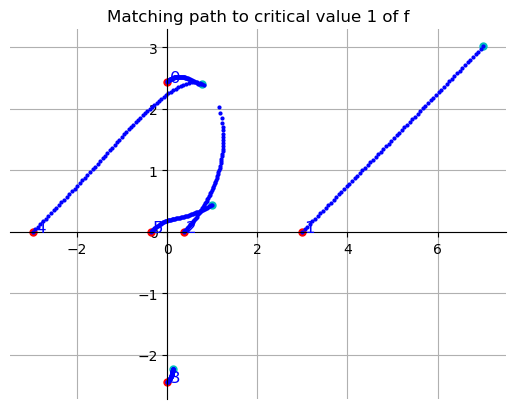

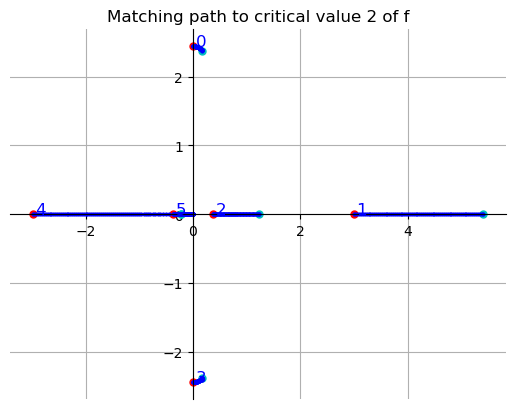

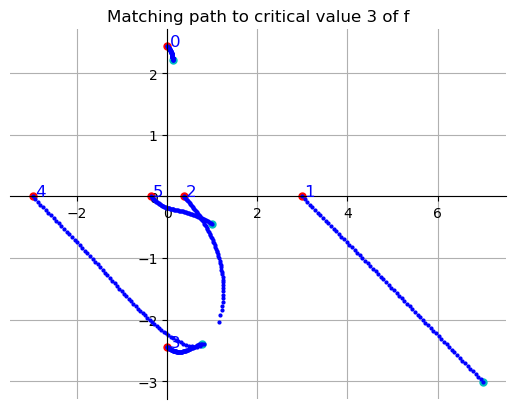

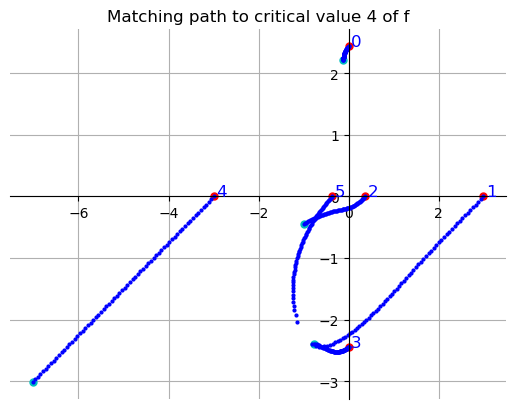

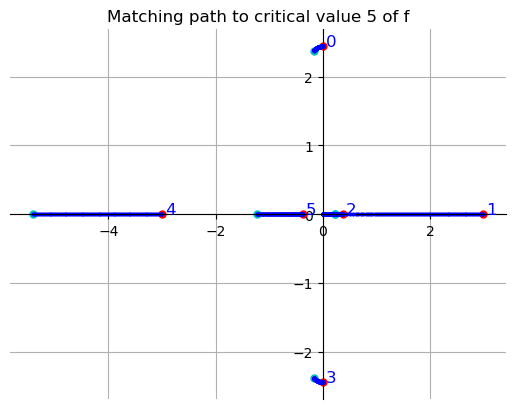

In [13]:
for index, crit in enumerate(crit_values_f):
    matching = f.get_matching_path(rho_eq, origin_fibre, crit, solvefor=y)
    fig, ax = plot_path(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre)
    plt.show()

### Plot using PW Linear paths avoiding collinear critical values

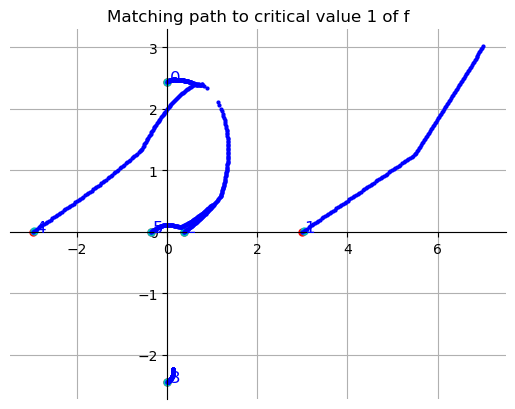

In [14]:

matching = f.get_matching_path(rho_eq, solvefor=y, path=pl_path_1(0, crit_values_f[1]))
fig, ax = plot_path(matching, title = f'Matching path to critical value 1 of f', origin_fibre=origin_fibre)
plt.show()

In [428]:
print(crit_values_f[1])
print(crit_values_f[2])

(3.2781296869160643+0j)
(1.6595844138804132+0j)


### 3D plot respecting time

In [14]:
for index, crit in enumerate(crit_values_f):
    matching = f.get_matching_path(rho_eq, origin_fibre, crit, solvefor=y)
    plot_path_3d(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre)

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

### Vanishing Cycles of $\rho$

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Critical values of rho'}>)

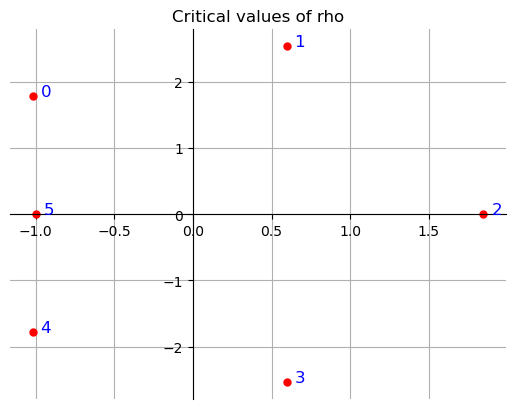

In [467]:
rho = LefschetzFibration(f.variables, fibre_t.subs(t==origin_fibre), rho_eq)
rho_t = rho.get_fibre(t, z)
crit_values_rho = sort_by_angle(rho.get_critical_values(), origin_fibre)
plot_points_ordered(crit_values_rho, title='Critical values of rho', origin_fibre=origin_fibre)

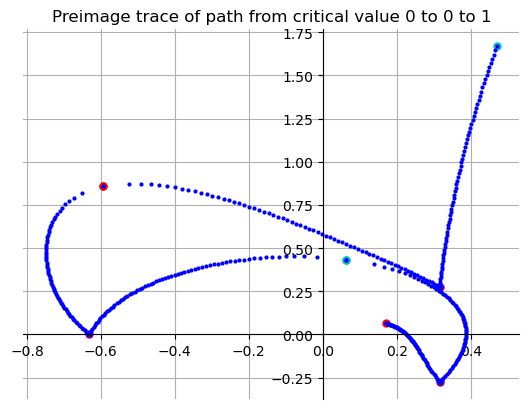

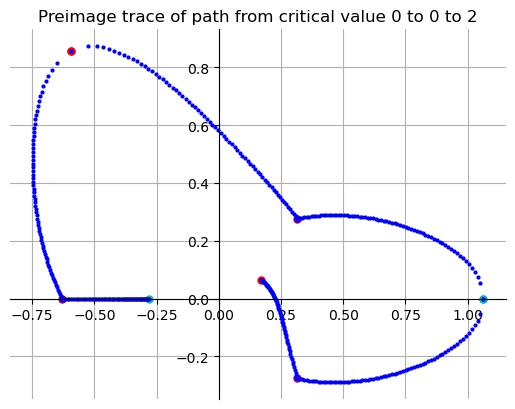

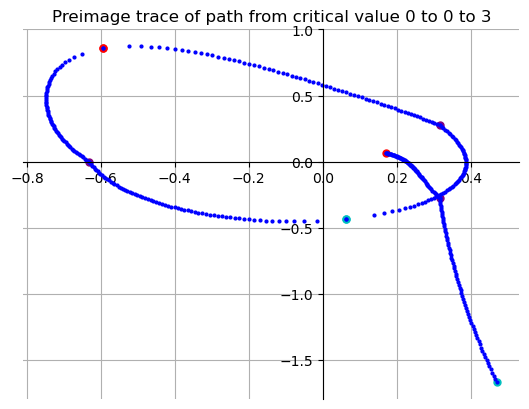

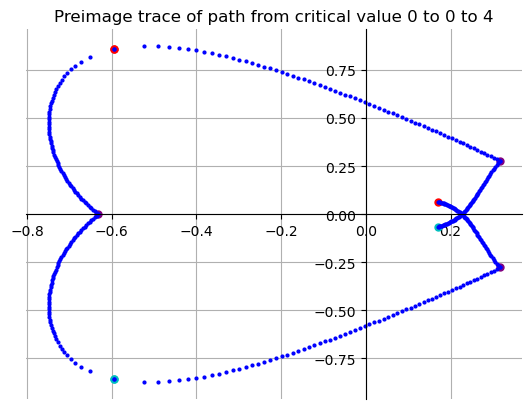

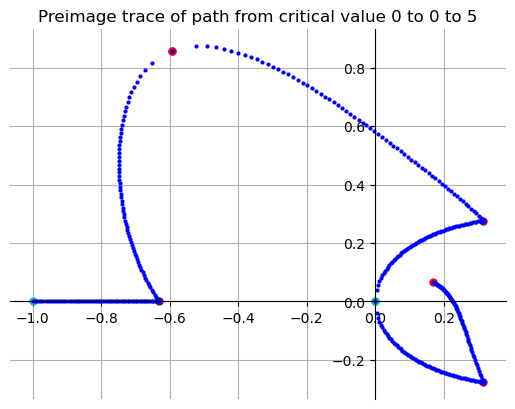

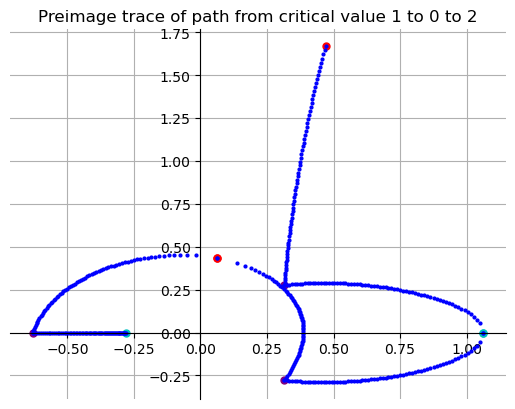

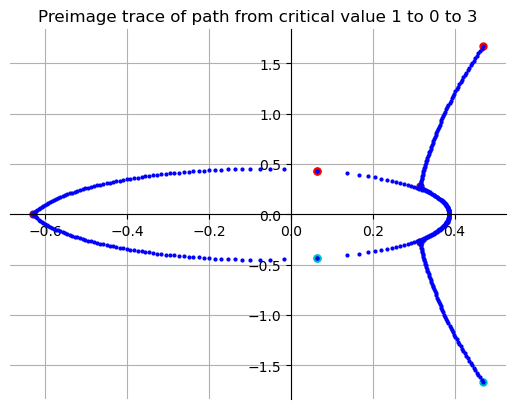

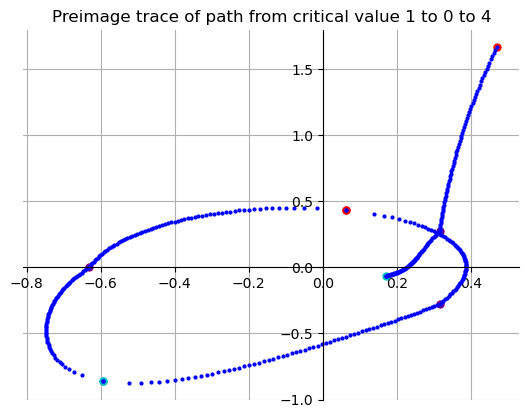

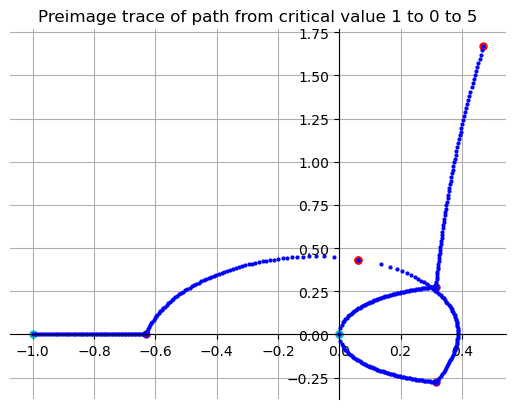

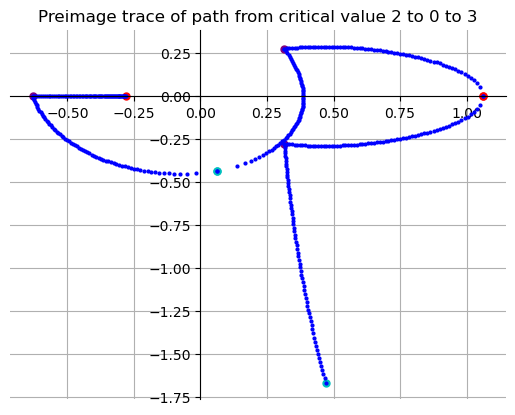

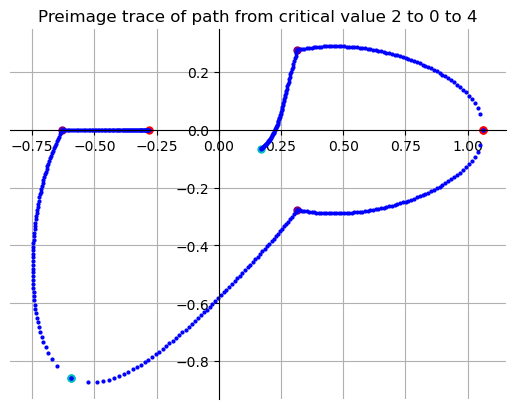

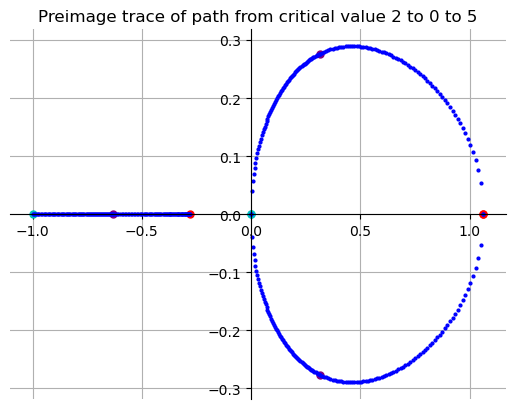

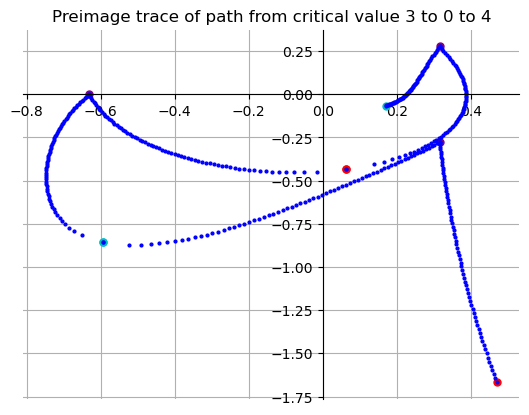

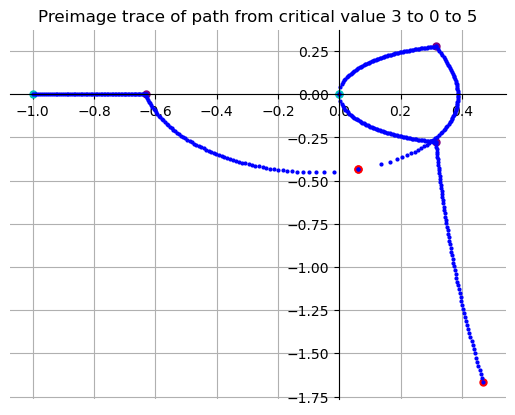

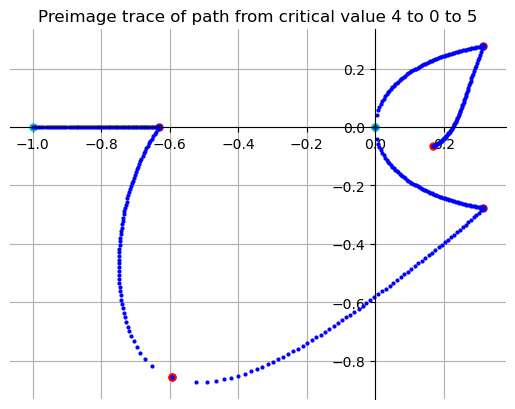

In [506]:

for index_1, point_1 in enumerate(crit_values_rho):
    for index_2, point_2 in enumerate(crit_values_rho):
        if not index_1 >= index_2:
            path = pl_path([point_1, origin_fibre, point_2], steps=70)
            fig, ax = trace_preimage(rho, t, path, solvefor=z, title=f'Preimage trace of path from critical value {index_1} to 0 to {index_2}')
            plt.show()
# path = pl_path([complex(0,0), crit_values_rho[1]], steps=140)
    

In [496]:
print(len(path))

140


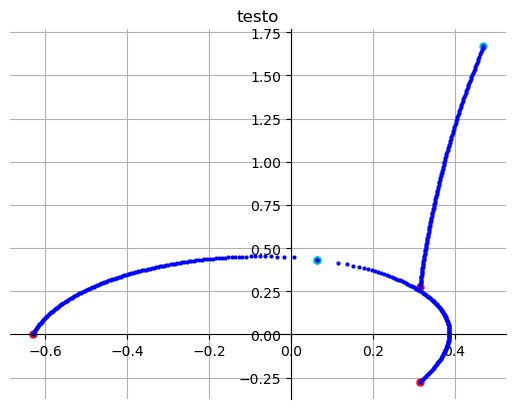

In [500]:
fig, ax = trace_preimage(rho, t, path, solvefor=z, title='testo')

plt.show()


In [466]:
s = path[5]
fibre_rho_s = rho.fibration - s
print(fibre_rho_s)
solve(fibre_rho_s==0, x)

3*x + z - 0.04315827121578832 - 0.18378056464573617*I


[x == -1/3*z + 19123810/312173543*I + 49740947/3457572252]